connecting libraries

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install chart_studio plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


connecting data

In [144]:
bee_df = pd.read_csv('bees.csv')
bee_df[:10]

,Unnamed: 0,colony.year,colony.months,colony.state,colony.colony_n,colony.colony_max,colony.colony_lost,colony.colony_lost_pct,colony.colony_added,colony.colony_reno,colony.colony_reno_pct
0,1,2015,January-March,Alabama,7000.0,7000.0,1800.0,26.0,2800.0,250.0,4.0
1,2,2015,January-March,Arizona,35000.0,35000.0,4600.0,13.0,3400.0,2100.0,6.0
2,3,2015,January-March,Arkansas,13000.0,14000.0,1500.0,11.0,1200.0,90.0,1.0
3,4,2015,January-March,California,1440000.0,1690000.0,255000.0,15.0,250000.0,124000.0,7.0
4,5,2015,January-March,Colorado,3500.0,12500.0,1500.0,12.0,200.0,140.0,1.0
5,6,2015,January-March,Connecticut,3900.0,3900.0,870.0,22.0,290.0,NaN,NaN
6,7,2015,January-March,Florida,305000.0,315000.0,42000.0,13.0,54000.0,25000.0,8.0
7,8,2015,January-March,Georgia,104000.0,105000.0,14500.0,14.0,47000.0,9500.0,9.0
8,9,2015,January-March,Hawaii,10500.0,10500.0,380.0,4.0,3400.0,760.0,7.0
9,10,2015,January-March,Idaho,81000.0,88000.0,3700.0,4.0,2600.0,8000.0,9.0


In [145]:
stress_df = pd.read_csv('beestressor.csv')
stress_df[:10]

,Unnamed: 0,stressor.year,stressor.months,stressor.state,stressor.stressor,stressor.stress_pct
0,1,2015,January-March,Alabama,Varroa mites,10.0
1,2,2015,January-March,Alabama,Other pests/parasites,5.4
2,3,2015,January-March,Alabama,Disesases,NaN
3,4,2015,January-March,Alabama,Pesticides,2.2
4,5,2015,January-March,Alabama,Other,9.1
5,6,2015,January-March,Alabama,Unknown,9.4
6,7,2015,January-March,Arizona,Varroa mites,26.9
7,8,2015,January-March,Arizona,Other pests/parasites,20.5
8,9,2015,January-March,Arizona,Disesases,0.1
9,10,2015,January-March,Arizona,Pesticides,NaN


we exclude the data of 2021, as they are incomplete

In [146]:
bee_df=bee_df[bee_df['colony.year']!=2021]

In [149]:
stress_df=stress_df[stress_df['stressor.year']!=2021]

In [150]:
bee_df=bee_df.fillna(bee_df.mean(numeric_only=True))

In [151]:
growth_data = bee_df.loc[:, ['colony.year',	'colony.months',	'colony.state', 'colony.colony_lost', 'colony.colony_added', 'colony.colony_reno']]
growth_data = growth_data[growth_data['colony.state']=='United States']
growth_data[:5]

,colony.year,colony.months,colony.state,colony.colony_lost,colony.colony_added,colony.colony_reno
46,2015,January-March,United States,500020.0,546980.0,270530.0
93,2015,April-June,United States,352860.0,661860.0,692850.0
140,2015,July-September,United States,457100.0,172990.0,303070.0
187,2015,October-December,United States,412380.0,117150.0,158790.0
234,2016,January-March,United States,428800.0,378160.0,158050.0


In [152]:
growth_data['colony.growth'] = (growth_data['colony.colony_reno'] + growth_data['colony.colony_added']) - growth_data['colony.colony_lost']

growth_data[:5]

,colony.year,colony.months,colony.state,colony.colony_lost,colony.colony_added,colony.colony_reno,colony.growth
46,2015,January-March,United States,500020.0,546980.0,270530.0,317490.0
93,2015,April-June,United States,352860.0,661860.0,692850.0,1001850.0
140,2015,July-September,United States,457100.0,172990.0,303070.0,18960.0
187,2015,October-December,United States,412380.0,117150.0,158790.0,-136440.0
234,2016,January-March,United States,428800.0,378160.0,158050.0,107410.0


In [153]:
fig = px.histogram(growth_data, x=['January-March 2015','April-June 2015','July-September 2015', 'October-December 2015','January-March 2016','April-June 2016','July-September 2016', 'October-December 2016', 'January-March 2017','April-June 2017','July-September 2017', 'October-December 2017', 'January-March 2018','April-June 2018','July-September 2018', 'October-December 2018','January-March 2019','April-June 2019','July-September 2019', 'October-December 2019','January-March 2020','April-June 2020','July-September 2020', 'October-December 2020'], y='colony.growth', title = 'The growth of bee colonies', color_discrete_sequence = ['black'])
fig.update_layout(
    font=dict(family='Times New Roman'),
    xaxis_title="",
    yaxis_title="growth"
)
fig.show()

***the number of lost colonies depending on the year and season***

In [154]:
yearsJM=[]
yearsAJ=[]
yearsJS=[]
yearsOD=[]
for smth in bee_df['colony.year'].unique():
  yearsJM.append(sum(bee_df[(bee_df['colony.state']=='United States') & (bee_df['colony.year']==smth) & (bee_df['colony.months']=='January-March')]['colony.colony_lost'])/len(bee_df[(bee_df['colony.state']=='United States') & (bee_df['colony.year']==smth) & (bee_df['colony.months']=='January-March')]))
  yearsAJ.append(sum(bee_df[(bee_df['colony.state']=='United States') & (bee_df['colony.year']==smth) & (bee_df['colony.months']=='April-June')]['colony.colony_lost'])/len(bee_df[(bee_df['colony.state']=='United States') & (bee_df['colony.year']==smth) & (bee_df['colony.months']=='April-June')]))
  yearsJS.append(sum(bee_df[(bee_df['colony.state']=='United States') & (bee_df['colony.year']==smth) & (bee_df['colony.months']=='July-September')]['colony.colony_lost'])/len(bee_df[(bee_df['colony.state']=='United States') & (bee_df['colony.year']==smth) & (bee_df['colony.months']=='July-September')]))
  yearsOD.append(sum(bee_df[(bee_df['colony.state']=='United States') & (bee_df['colony.year']==smth) & (bee_df['colony.months']=='October-December')]['colony.colony_lost'])/len(bee_df[(bee_df['colony.state']=='United States') & (bee_df['colony.year']==smth) & (bee_df['colony.months']=='October-December')]))

In [155]:
df_plotly_lost=pd.DataFrame({'years' : [2015,2016,2017,2018,2019,2020],
                        'January-March':yearsJM,
                        'April-June':yearsAJ,
                        'July-September':yearsJS,
                        'October-December':yearsOD})
fig = px.line(df_plotly_lost, x='years', y=['January-March','April-June','July-September', 'October-December'], markers=True, color_discrete_sequence=[
                 'blue', 'green', 'yellow','black'])
fig.update_layout(
    title_text = 'The number of lost colonies depending on the year and season',
    font=dict(family='Times New Roman')
)
fig.show()

***the number of lost, added and renovated colonies depending on the year***

In [156]:
years_lost=[]
for smth in bee_df['colony.year'].unique():
  years_lost.append(sum(bee_df[(bee_df['colony.state']=='United States') & (bee_df['colony.year']==smth)]['colony.colony_lost'])/len(bee_df[(bee_df['colony.state']=='United States') & (bee_df['colony.year']==smth)]))
years_add=[]
for smth in bee_df['colony.year'].unique():
  years_add.append(sum(bee_df[(bee_df['colony.state']=='United States') & (bee_df['colony.year']==smth)]['colony.colony_added'])/len(bee_df[(bee_df['colony.state']=='United States') & (bee_df['colony.year']==smth)]))
years_reno=[]
for smth in bee_df['colony.year'].unique():
  years_reno.append(sum(bee_df[(bee_df['colony.state']=='United States') & (bee_df['colony.year']==smth)]['colony.colony_reno'])/len(bee_df[(bee_df['colony.state']=='United States') & (bee_df['colony.year']==smth)]))

In [157]:
df_plotly_years=pd.DataFrame({'years' : bee_df['colony.year'].unique(),
                        'lost': years_lost,
                        'added': years_add,
                        'renovated':years_reno}
                        )
fig = px.line(df_plotly_years, x='years', y=['lost','added','renovated'], markers=True, color_discrete_sequence=[
                 'black', 'yellow', 'green'])
fig.update_layout(
    title_text = 'The number of lost, added and renovated colonies depending on the year',
    font=dict(family='Times New Roman')
)
fig.show()

In [158]:
stress = len(stress_df['stressor.state'].unique()) + len(stress_df['stressor.stressor'].unique())

In [159]:
stress_data = stress_df.loc[:, ['stressor.year','stressor.stressor', 'stressor.stress_pct', 'stressor.state']]
stress_data[:5]

,stressor.year,stressor.stressor,stressor.stress_pct,stressor.state
0,2015,Varroa mites,10.0,Alabama
1,2015,Other pests/parasites,5.4,Alabama
2,2015,Disesases,NaN,Alabama
3,2015,Pesticides,2.2,Alabama
4,2015,Other,9.1,Alabama


In [160]:
corr_stress_state_data = stress_data.groupby(['stressor.stressor', 'stressor.state']).sum().reset_index().pivot(index='stressor.stressor', columns='stressor.state', values='stressor.stress_pct')/stress
del corr_stress_state_data['United States']
corr_stress_state_data[:5]

stressor.state,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Florida,Georgia,Hawaii,Idaho,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
stressor.stressor,,,,,,,,,,,,,,,,,,,,,
Disesases,0.781132,2.084906,1.298113,3.086792,1.654717,0.239623,2.477358,1.786792,0.101887,3.683019,...,1.273585,0.467925,1.445283,1.826415,1.596226,0.845283,1.284906,0.645283,3.666038,1.190566
Other,2.469811,4.152830,2.637736,4.145283,2.707547,2.162264,3.745283,3.794340,0.452830,2.967925,...,5.120755,2.954717,2.266038,1.766038,0.681132,2.709434,1.720755,3.249057,4.711321,1.522642
Other pests/parasites,10.886792,3.958491,7.139623,5.405660,1.879245,0.983019,8.435849,6.698113,21.784906,4.356604,...,3.671698,10.316981,6.143396,2.584906,2.741509,7.084906,1.554717,3.464151,5.935849,1.345283
Pesticides,2.779245,3.366038,7.294340,5.369811,2.550943,0.186792,5.369811,5.433962,0.067925,4.186792,...,3.449057,2.401887,3.637736,3.416981,2.715094,1.118868,1.975472,0.681132,6.101887,1.354717
Unknown,3.428302,2.609434,3.362264,1.956604,1.169811,0.809434,4.243396,2.467925,0.018868,1.307547,...,0.839623,2.433962,1.924528,2.039623,0.664151,2.335849,0.598113,1.213208,4.516981,0.964151


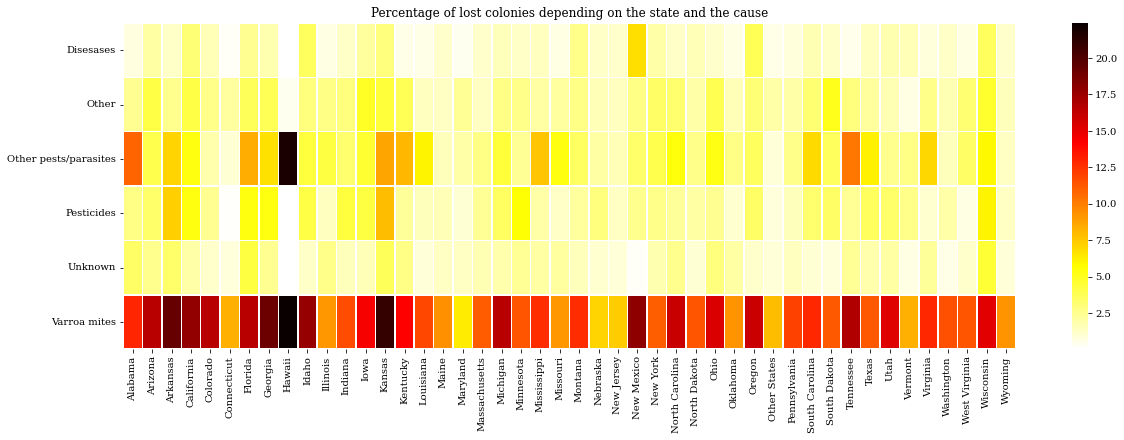

In [161]:
fig, ax = plt.subplots(figsize=(20,6))
my_map = sns.heatmap(corr_stress_state_data.values, yticklabels=corr_stress_state_data.index,
    xticklabels=corr_stress_state_data.columns, linewidths=.5, cmap="hot_r").set_title("Percentage of lost colonies depending on the state and the cause")
my_map = sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
my_map

***Percentage of lost colonies depending on the year and the cause***

In [162]:
corr_stress_year_data = stress_data.groupby(['stressor.stressor', 'stressor.year']).sum().reset_index().pivot(index='stressor.stressor', columns='stressor.year', values='stressor.stress_pct')/188
corr_stress_year_data[:5]

stressor.year,2015,2016,2017,2018,2019,2020
stressor.stressor,,,,,,
Disesases,3.178191,3.719149,5.053723,3.892553,2.889894,2.769149
Other,6.300532,5.745213,6.591489,7.737766,4.826064,4.998404
Other pests/parasites,11.016489,10.057979,11.121809,14.269681,9.042553,9.154255
Pesticides,6.793085,6.452128,7.114362,7.934043,5.688298,4.680851
Unknown,4.020745,4.277660,4.206915,4.624468,3.011702,4.187234


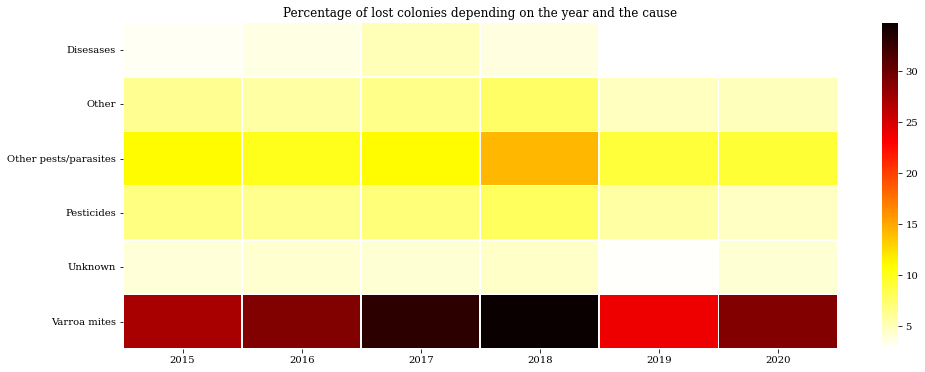

In [163]:
fig, ax = plt.subplots(figsize=(16,6))
my_map = sns.heatmap(corr_stress_year_data.values, yticklabels=corr_stress_year_data.index,
    xticklabels=corr_stress_year_data.columns, linewidths=.5, cmap="hot_r").set_title("Percentage of lost colonies depending on the year and the cause")
my_map = sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
my_map

***Maps: Percent of bees colonies lost among the states***

In [164]:
allstates=[]
for smth in bee_df[bee_df['colony.state']!='United States'][bee_df['colony.state']!='Other States']['colony.state'].unique():
  allstates.append(smth)
print(allstates)

['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [166]:
bee_df[bee_df['colony.state']!='United States'][bee_df['colony.state']!='Other States']['colony.state'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [167]:
stateres={}
for smth in allstates:
  print(smth)
  print(sum(bee_df[bee_df['colony.state']==smth]['colony.colony_lost_pct']))
  print(len(bee_df[bee_df['colony.state']==smth]))
  stateres[smth]=sum(bee_df[bee_df['colony.state']==smth]['colony.colony_lost_pct'])/len(bee_df[bee_df['colony.state']==smth])

Alabama
353.4706976744186
24
Arizona
413.4706976744186
24
Arkansas
352.4706976744186
24
California
272.4706976744186
24
Colorado
331.4706976744186
24
Connecticut
170.4706976744186
24
Florida
326.4706976744186
24
Georgia
310.4706976744186
24
Hawaii
145.9413953488372
24
Idaho
242.4706976744186
24
Illinois
341.4706976744186
24
Indiana
304.4706976744186
24
Iowa
273.4706976744186
24
Kansas
461.4706976744186
24
Kentucky
355.4706976744186
24
Louisiana
177.4706976744186
24
Maine
208.4706976744186
24
Maryland
292.4706976744186
24
Massachusetts
288.4706976744186
24
Michigan
294.4706976744186
24
Minnesota
261.4706976744186
24
Mississippi
236.4706976744186
24
Missouri
228.4706976744186
24
Montana
179.4120930232558
24
Nebraska
220.4706976744186
24
New Jersey
138.4706976744186
24
New Mexico
417.4706976744186
24
New York
269.4706976744186
24
North Carolina
309.4706976744186
24
North Dakota
186.4706976744186
24
Ohio
366.4706976744186
24
Oklahoma
259.4120930232558
24
Oregon
190.4706976744186
24
Pennsyl

In [168]:
dfmap = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

In [169]:
finres={}
for smth in dfmap['state']:
  if smth in stateres:
    finres[smth]=stateres[smth]
  else:
    finres[smth]=0
finres

{'Alabama': 14.727945736434108,
 'Alaska': 0,
 'Arizona': 17.22794573643411,
 'Arkansas': 14.686279069767442,
 'California': 11.352945736434108,
 'Colorado': 13.811279069767442,
 'Connecticut': 7.102945736434108,
 'Delaware': 0,
 'Florida': 13.602945736434108,
 'Georgia': 12.936279069767442,
 'Hawaii': 6.080891472868217,
 'Idaho': 10.102945736434108,
 'Illinois': 14.227945736434108,
 'Indiana': 12.686279069767442,
 'Iowa': 11.394612403100775,
 'Kansas': 19.22794573643411,
 'Kentucky': 14.811279069767442,
 'Louisiana': 7.394612403100775,
 'Maine': 8.686279069767442,
 'Maryland': 12.186279069767442,
 'Massachusetts': 12.019612403100775,
 'Michigan': 12.269612403100775,
 'Minnesota': 10.894612403100775,
 'Mississippi': 9.852945736434108,
 'Missouri': 9.519612403100775,
 'Montana': 7.475503875968992,
 'Nebraska': 9.186279069767442,
 'Nevada': 0,
 'New Hampshire': 0,
 'New Jersey': 5.769612403100775,
 'New Mexico': 17.394612403100776,
 'New York': 11.227945736434108,
 'North Carolina': 12.8

In [170]:
finres=pd.DataFrame(list(finres.items()),
                   columns=['State', 'colony_lost'])

In [171]:
fig = go.Figure(data=go.Choropleth(
    locations=dfmap['code'],
    z=finres['colony_lost'],
    locationmode="USA-states",
    colorscale='hot_r',
    autocolorscale=False,
    marker_line_color='white', # line markers between states
    colorbar_title="colony lost pct"
))
fig.update_layout(
    title_text = 'Percent of bees colonies lost among the states',
    geo_scope='usa', # limite map scope to USA
    font=dict(family='Times New Roman')
)

fig.show()

In [172]:
stateres={}
for smth in allstates:
  stateres[smth]=sum(bee_df[bee_df['colony.state']==smth][bee_df['colony.months']=='January-March']['colony.colony_lost_pct'])/len(bee_df[bee_df['colony.state']==smth][bee_df['colony.months']=='January-March'])
finres={}
for smth in dfmap['state']:
  if smth in stateres:
    finres[smth]=stateres[smth]
  else:
    finres[smth]=0
finres=pd.DataFrame(list(finres.items()),
                   columns=['State', 'colony_lost'])
fig = go.Figure(data=go.Choropleth(
    locations=dfmap['code'],
    z=finres['colony_lost'],
    locationmode="USA-states",
    colorscale='hot_r',
    autocolorscale=False,
    marker_line_color='white', # line markers between states
    colorbar_title="colony lost pct"
))
fig.update_layout(
    title_text = 'Percent of bees colonies lost among the states: January-March',
    geo_scope='usa', # limite map scope to USA
    font=dict(family='Times New Roman')
)

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [173]:
stateres={}
for smth in allstates:
  stateres[smth]=sum(bee_df[bee_df['colony.state']==smth][bee_df['colony.months']=='April-June']['colony.colony_lost_pct'])/len(bee_df[bee_df['colony.state']==smth][bee_df['colony.months']=='January-March'])
finres={}
for smth in dfmap['state']:
  if smth in stateres:
    finres[smth]=stateres[smth]
  else:
    finres[smth]=0
finres=pd.DataFrame(list(finres.items()),
                   columns=['State', 'colony_lost'])
fig = go.Figure(data=go.Choropleth(
    locations=dfmap['code'],
    z=finres['colony_lost'],
    locationmode="USA-states",
    colorscale='hot_r',
    autocolorscale=False,
    marker_line_color='white', # line markers between states
    colorbar_title="colony lost pct"
))
fig.update_layout(
    title_text = 'Percent of bees colonies lost among the states: April-June',
    geo_scope='usa', # limite map scope to USA
    font=dict(family='Times New Roman')
)
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [175]:
stateres={}
for smth in allstates:
  stateres[smth]=sum(bee_df[bee_df['colony.state']==smth][bee_df['colony.months']=='July-September']['colony.colony_lost_pct'])/len(bee_df[bee_df['colony.state']==smth][bee_df['colony.months']=='January-March'])
finres={}
for smth in dfmap['state']:
  if smth in stateres:
    finres[smth]=stateres[smth]
  else:
    finres[smth]=0
finres=pd.DataFrame(list(finres.items()),
                   columns=['State', 'colony_lost'])
fig = go.Figure(data=go.Choropleth(
    locations=dfmap['code'],
    z=finres['colony_lost'],
    locationmode="USA-states",
    colorscale='hot_r',
    autocolorscale=False,
    marker_line_color='white', # line markers between states
    colorbar_title="colony lost pct"
))
fig.update_layout(
    title_text = 'Percent of bees colonies lost among the states: July-September',
    geo_scope='usa', # limite map scope to USA
    font=dict(family='Times New Roman')
)

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [176]:
stateres={}
for smth in allstates:
  stateres[smth]=sum(bee_df[bee_df['colony.state']==smth][bee_df['colony.months']=='October-December']['colony.colony_lost_pct'])/len(bee_df[bee_df['colony.state']==smth][bee_df['colony.months']=='January-March'])
finres={}
for smth in dfmap['state']:
  if smth in stateres:
    finres[smth]=stateres[smth]
  else:
    finres[smth]=0
finres=pd.DataFrame(list(finres.items()),
                   columns=['State', 'colony_lost'])
fig = go.Figure(data=go.Choropleth(
    locations=dfmap['code'],
    z=finres['colony_lost'],
    locationmode="USA-states",
    colorscale='hot_r',
    autocolorscale=False,
    marker_line_color='white', # line markers between states
    colorbar_title="colony lost pct"
))
fig.update_layout(
    title_text = 'Percent of bees colonies lost among the states: October-December',
    geo_scope='usa', # limite map scope to USA
    font=dict(family='Times New Roman')
)

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

